# Un clustering completo: la fase de exploración de datos

* X Dataset (array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con info de las uniones
* k numero de clusters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage

(150, 2)


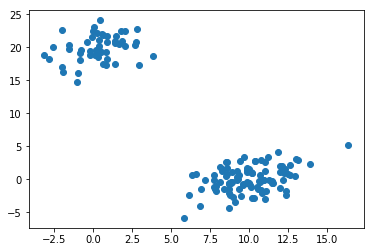

In [3]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])

In [4]:
Z = linkage(X, "ward")
Z.shape

(149, 4)

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [7]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [8]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [9]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [10]:
print(Z[152-len(X)])
print(Z[158-len(X)])

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [11]:
X[[33,62, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

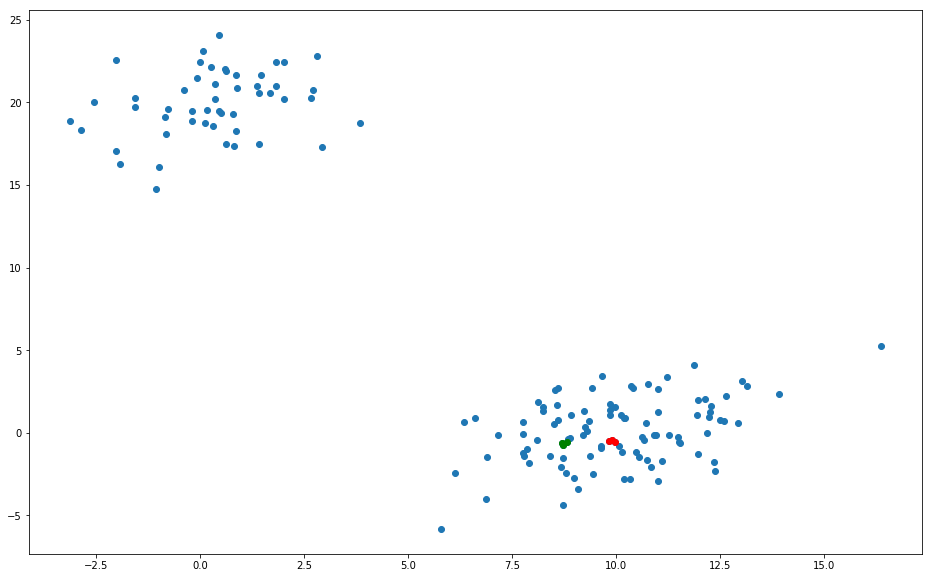

In [12]:
idx=[33,62, 68]
idx2=[15,69, 41]
plt.figure(figsize=(16,10))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idx,0],X[idx,1],c="r")
plt.scatter(X[idx2,0],X[idx2,1],c="g")

# Representación del dendrograma

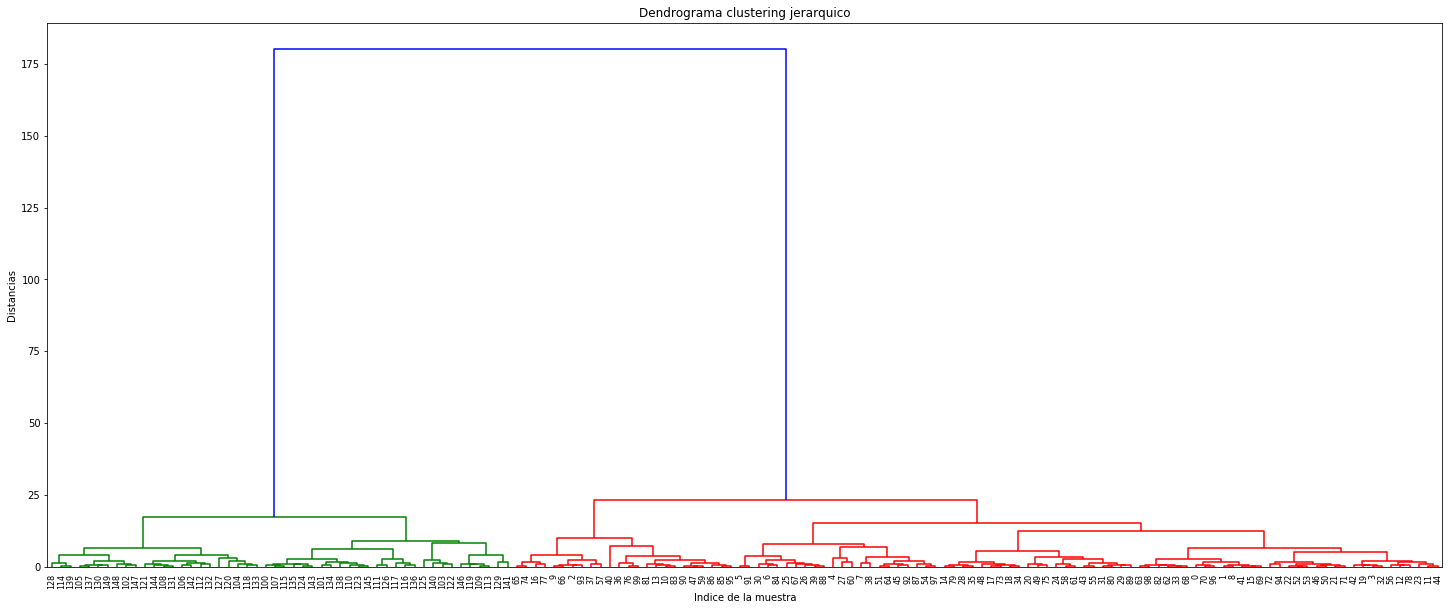

In [13]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma clustering jerarquico")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90,leaf_font_size=8)
plt.show()

In [14]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

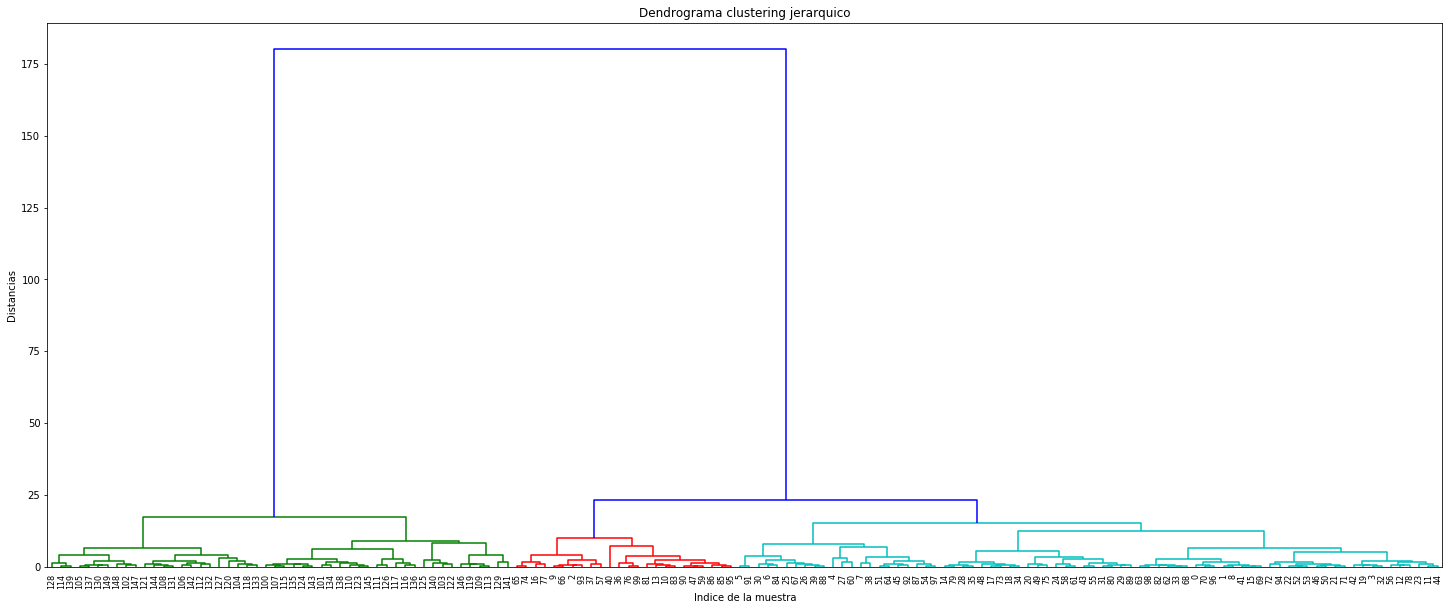

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma clustering jerarquico")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90,leaf_font_size=8,color_threshold=0.1*180)
plt.show()

## Truncar el dendrograma

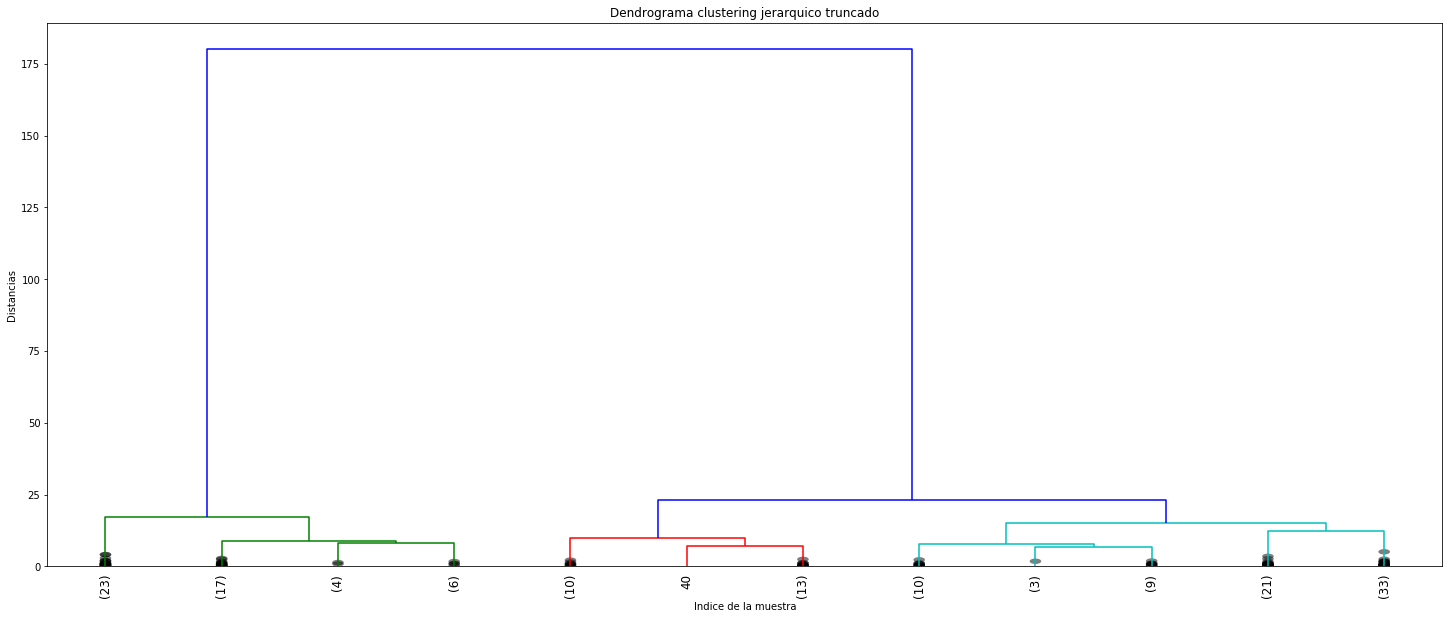

In [16]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma clustering jerarquico truncado")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90,leaf_font_size=12,color_threshold=0.1*180, show_leaf_counts=True,show_contracted=True,
           truncate_mode="lastp",p=12 )
plt.show()

## Dendrograma personalizado

In [17]:
def dendrogram_tune(*args, **kwargs):
    max_d=kwargs.pop("max_d",None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerarquico con dendrograma truncado")
        plt.xlabel("Indice de Dataset")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'],ddata['dcoord'],ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords="offset points",va="top",ha="center")
    if max_d:
        plt.axhline(y=max_d,c='k')
        
    return ddata

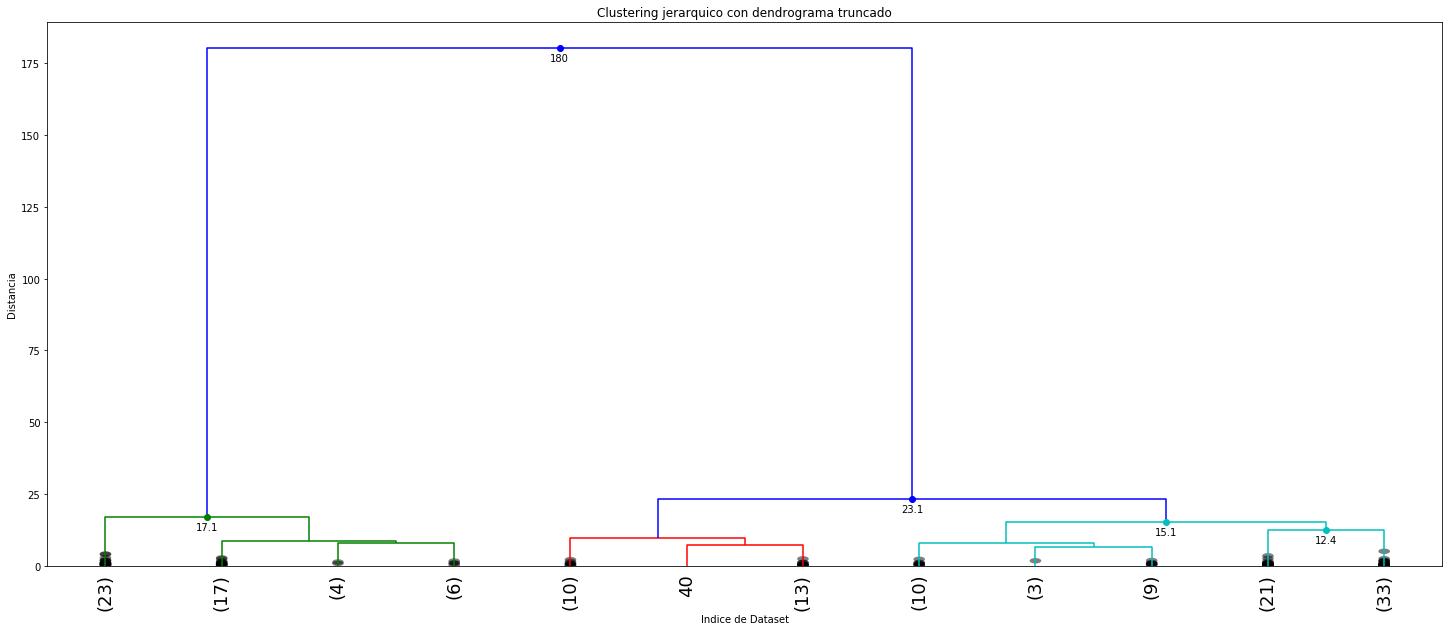

In [18]:
plt.figure(figsize=(25,10))
dendrogram_tune(Z,truncate_mode="lastp",p=12, leaf_rotation=90.,leaf_font_size=18.,show_contracted=True,annotate_above=10
               ,color_threshold=0.1*180)
plt.show()

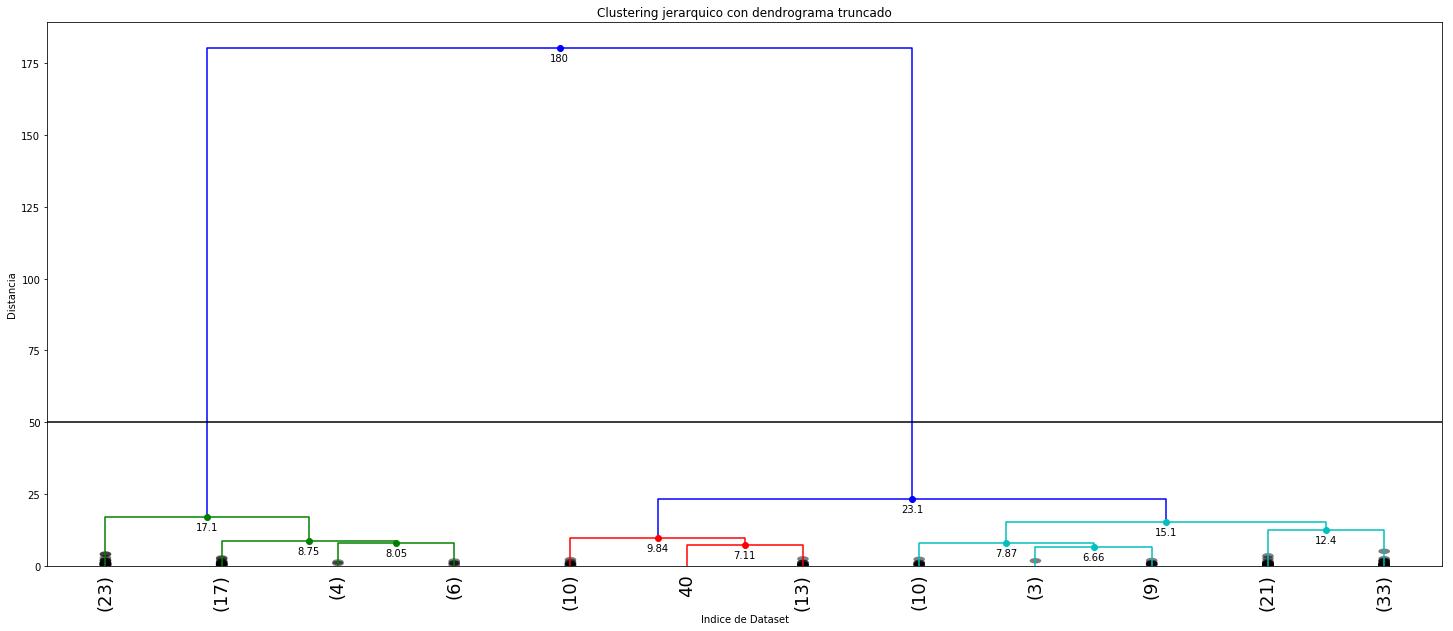

In [19]:
plt.figure(figsize=(25,10))
dendrogram_tune(Z,truncate_mode="lastp",p=12, leaf_rotation=90.,leaf_font_size=18.,show_contracted=True,max_d=50
               ,color_threshold=0.1*180)
plt.show()

# Un clustering completo por donde cortamos el dendrograma

## Metodo de la inconsistencia

In [20]:
from scipy.cluster.hierarchy import inconsistent

In [24]:
depth = 5
incons = inconsistent(Z,depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

In [25]:
depth = 3
incons = inconsistent(Z,depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

## son muy dependiente del nivel del análisis

## Metodo del codo

In [28]:
last = Z[-10:,2]
last

array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
         9.84427829,  12.42734657,  15.11533118,  17.11527362,
        23.12198936, 180.27043021])

In [29]:
last_rev = last[::-1] # revertidos
last_rev

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

In [30]:
idx = np.arange(1,len(last)+1)

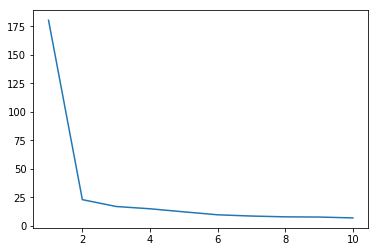

In [31]:
plt.plot(idx,last_rev)

In [34]:
acc = np.diff(last,2)
acc

array([-5.77157189e-01,  5.18302524e-01,  3.97185622e-01,  1.48701273e+00,
        1.04916333e-01, -6.88042176e-01,  4.00677330e+00,  1.51141725e+02])

In [36]:
acc_rev = acc[::-1]
acc_rev

array([ 1.51141725e+02,  4.00677330e+00, -6.88042176e-01,  1.04916333e-01,
        1.48701273e+00,  3.97185622e-01,  5.18302524e-01, -5.77157189e-01])

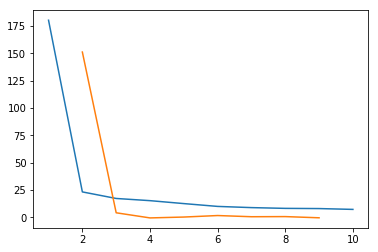

In [38]:
plt.plot(idx,last_rev)
plt.plot(idx[:-2]+1,acc_rev)

In [40]:
k = acc_rev.argmax() + 2
print(k)

2


In [44]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]],size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]],size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]],size=[200,])

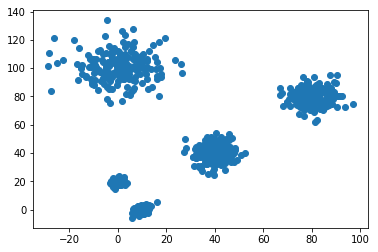

In [46]:
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0],X2[:,1])

In [47]:
Z2 = linkage(X2, "ward")
Z2.shape

(749, 4)

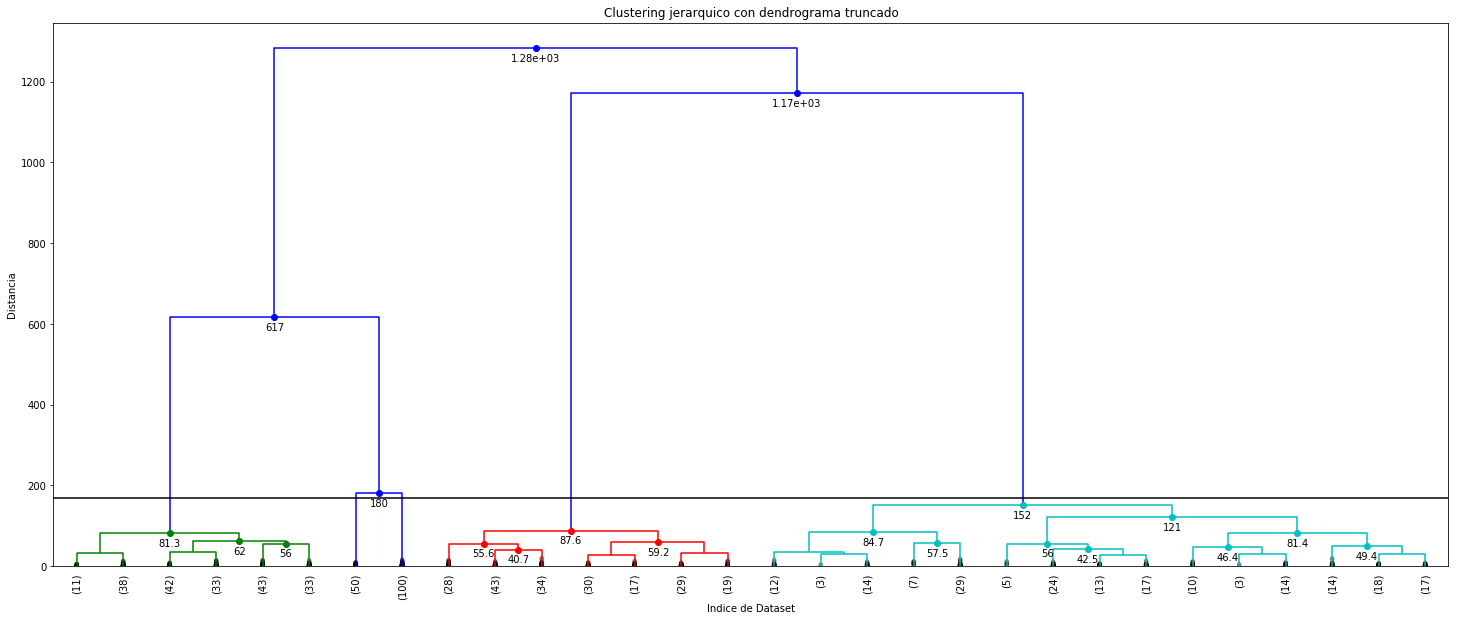

In [51]:
plt.figure(figsize=(25,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30, 
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=40,
    max_d = 170
)
plt.show()

4


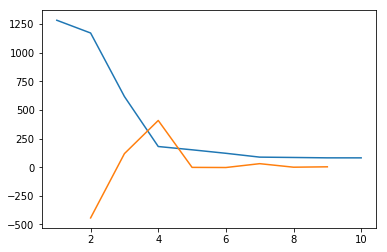

In [52]:
last = Z2[-10:,2]
last_rev = last[::-1] # revertidos
idx = np.arange(1,len(last)+1)
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx,last_rev)
plt.plot(idx[:-2]+1,acc_rev)
k = acc_rev.argmax() + 2
print(k)

In [53]:
print(inconsistent(Z2,5)[-10:])

[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]
